# Arya.ai Data Scientist Assignment

## Importing the Dependinces

In [59]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Data Collection

In [6]:
#loading the dataset in a pandas datafame and removing first column (index column)
df = pd.read_csv("./Downloads/Arya_Assignment/training_set.csv").iloc[:, 1:]

# check first five rows of the dataset
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [7]:
#check last five rows of the dataset
df.tail(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
3905,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,7.31,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,18.18,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,0.12,0.0,0.12,0.0,0.0,0.25,0.0,0.00,0.00,0.0,0.00,0.12,0.25,0.0,0.00,0.12,0.00,0.00,2.19,0.0,0.51,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.64,0.25,0.12,0.0,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,0.00,0.0,0.00,0.0,0.0,0.00,0.0,3.12,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.04,0.00,0.0,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1
3909,0.96,0.0,0.48,0.0,0.0,0.96,0.0,0.00,0.48,0.0,0.48,0.00,0.00,0.0,1.44,0.48,0.48,2.41,0.00,0.0,0.96,0.0,0.0,0.48,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.48,0.0,0.0,0.0,0.818,0.0,0.175,0.467,0.116,9.560,259,717,1


In [8]:
#check shape of the dataset
df.shape

(3910, 58)

In [9]:
#check mathamatic realtionship of the dataset
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.00000

In [10]:
#check more infomation of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

In [11]:
#check missing values of the dataset
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

In [12]:
cols = df.columns
cols

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'Y'],
      dtype='object')

In [13]:
num_cols = df._get_numeric_data().columns
num_cols

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'Y'],
      dtype='object')

## EDA of the dataset

In [14]:
#count the values of target column Y
df['Y'].value_counts()

0    2376
1    1534
Name: Y, dtype: int64

<AxesSubplot:xlabel='Y', ylabel='count'>

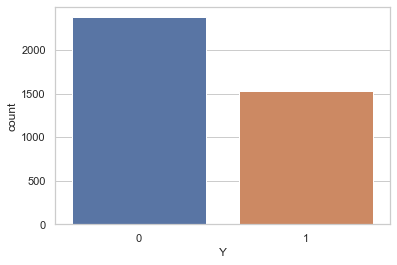

In [15]:
sns.countplot(df['Y'])

In [16]:
# percentage of class present in target variable(Y) 
print("Percentage of 0 and 1\n",df["Y"].value_counts()/len(df)*100)

Percentage of 0 and 1
 0    60.767263
1    39.232737
Name: Y, dtype: float64


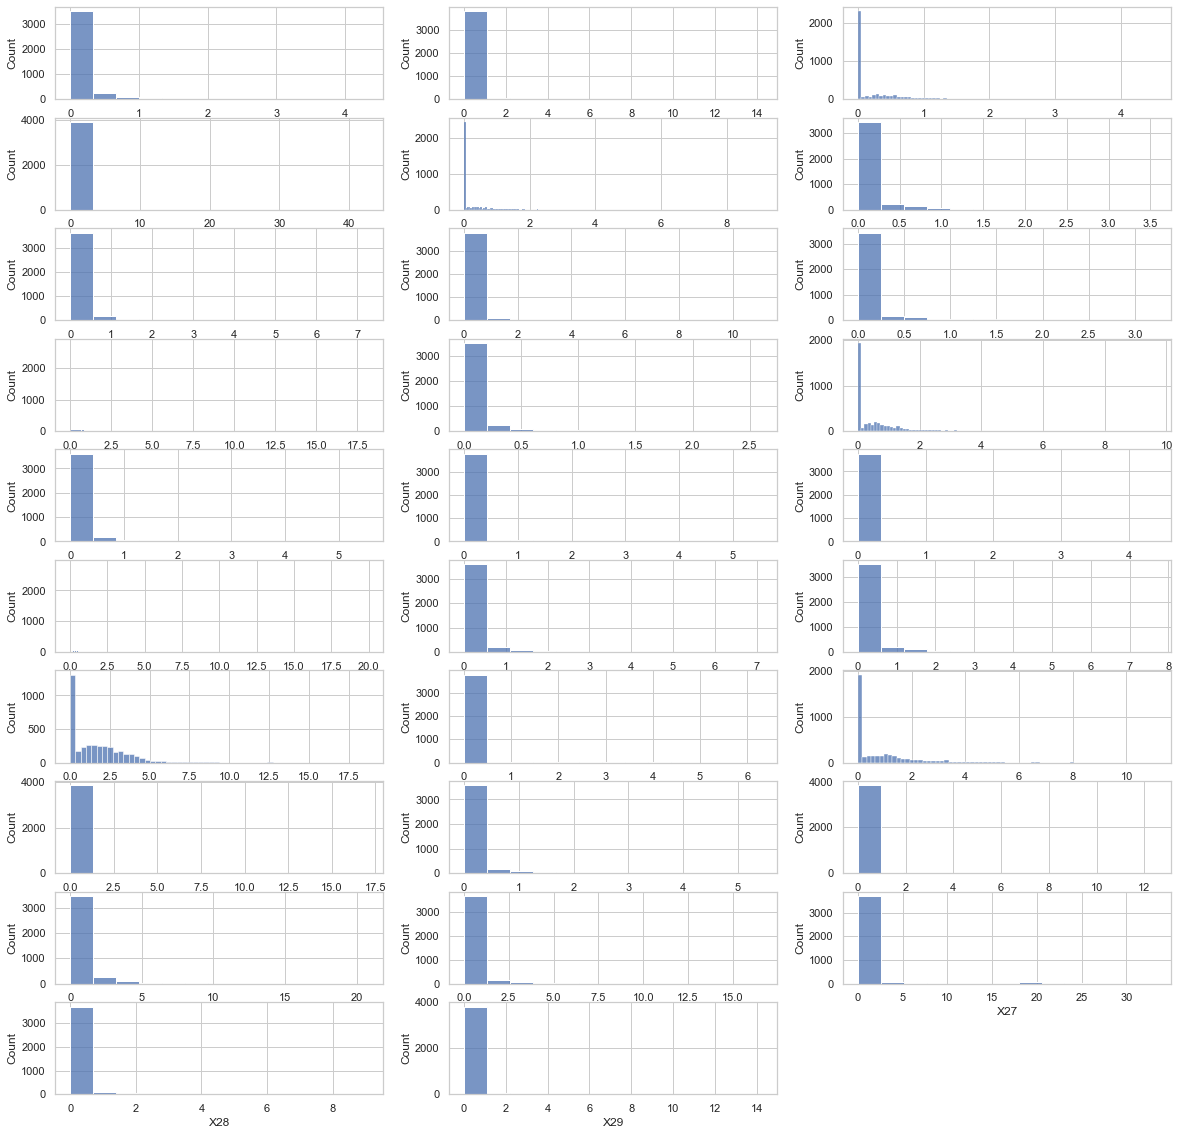

In [17]:
# Univariate analysis
# Plotting Histograms for numerical data
i = 1
plt.figure(figsize=(20,20))
for columns in num_cols[:29]:
    plt.subplot(10,3,i)
    sns.histplot(x=columns,data=df)
    i+=1

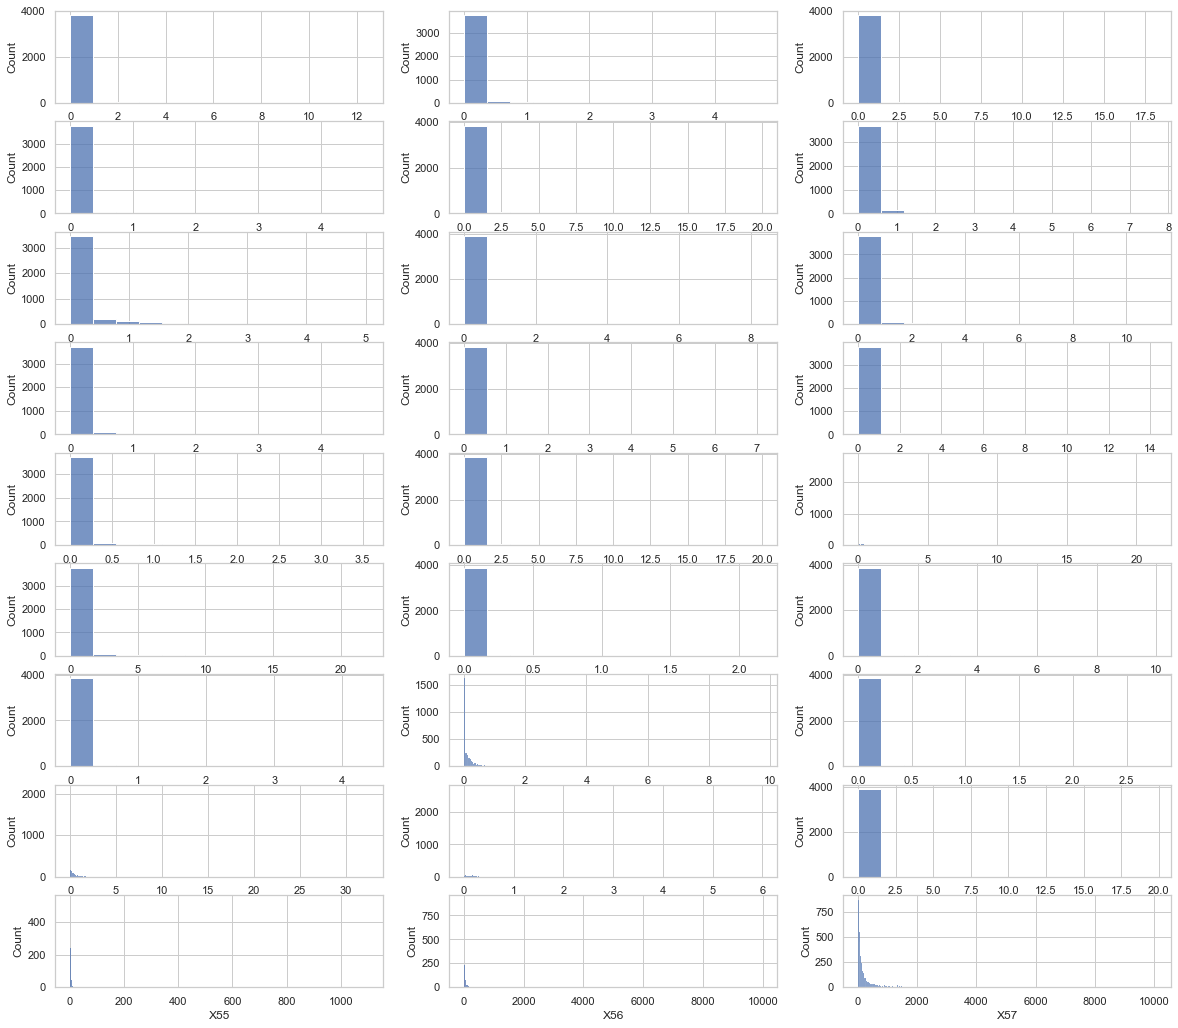

In [18]:
i = 1
plt.figure(figsize=(20,20))
for columns in num_cols[30:57]:
    plt.subplot(10,3,i)
    sns.histplot(x=columns,data=df)
    i+=1

The data are right-skewed, it implies the mean is typically GREATER THAN the median.

<AxesSubplot:>

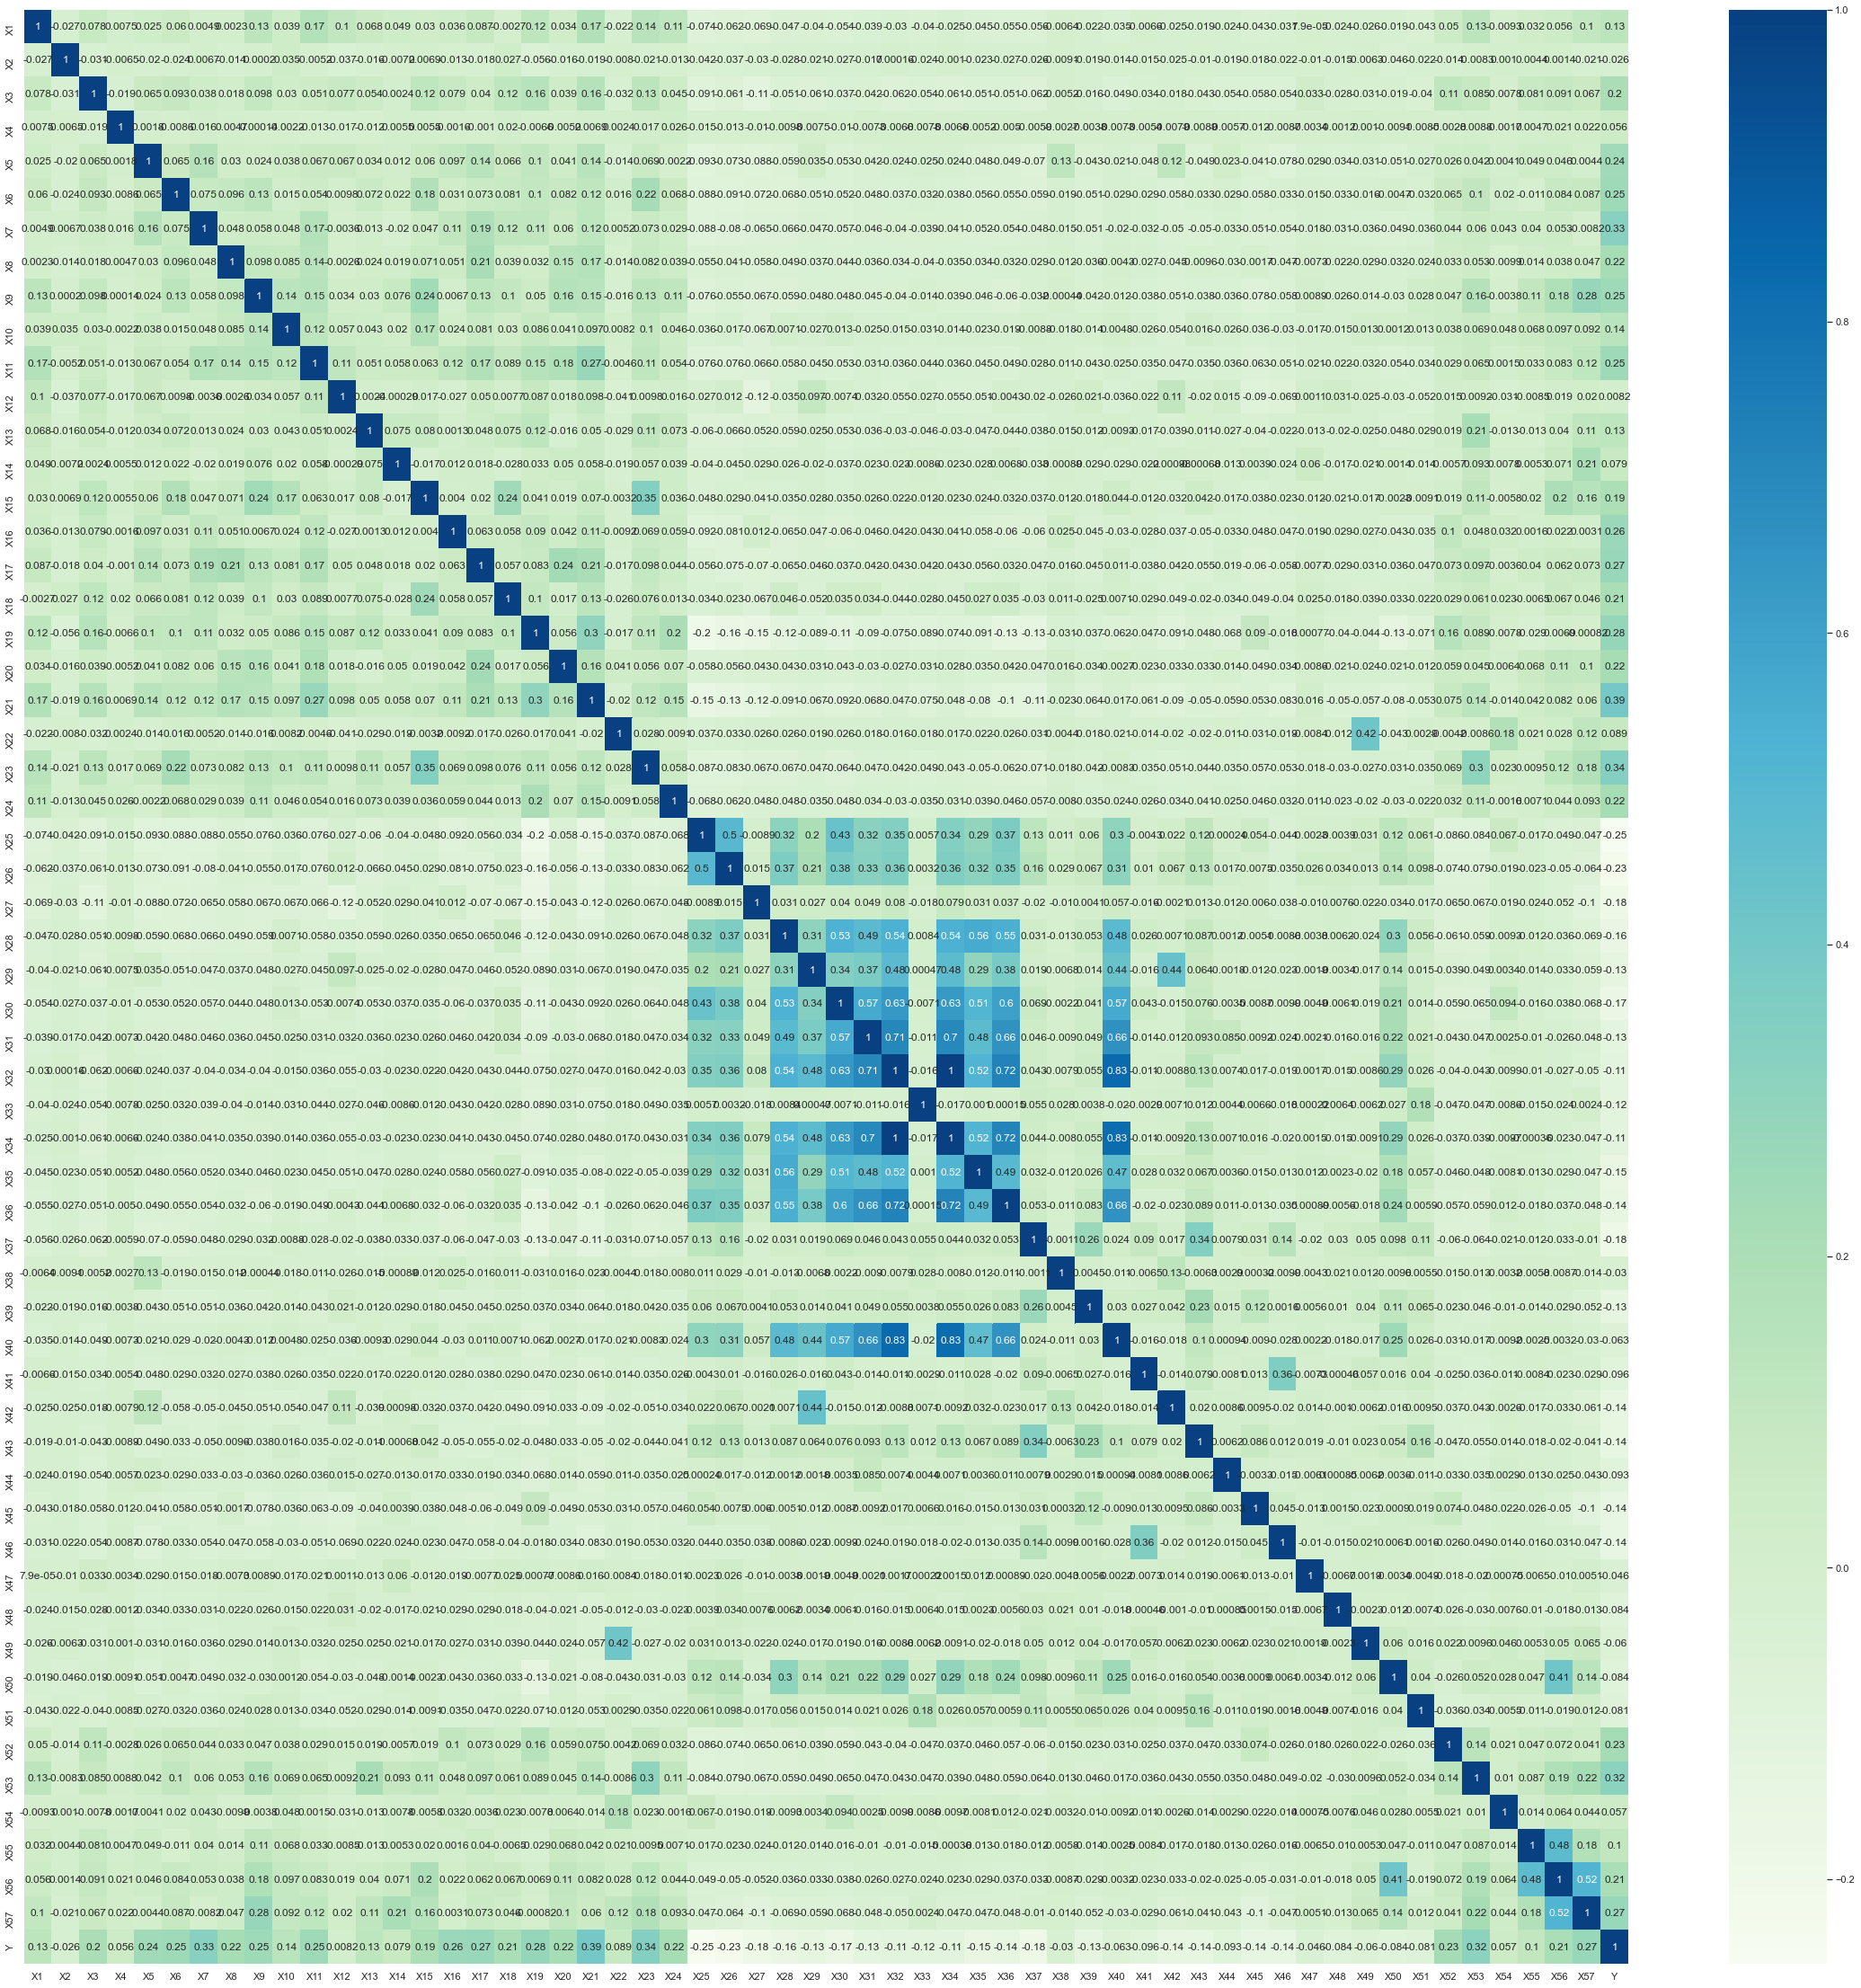

In [19]:
# correlation analysis
plt.figure(figsize=(40,40))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

In [20]:
correlation

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
X1,1.000000,-0.026677,0.078010,0.007472,0.025377,0.060360,0.004934,0.002262,0.128300,0.038547,0.171678,0.104751,0.067566,0.048698,0.030180,0.035730,0.086834,-0.002730,0.123357,0.034077,0.173419,-0.022427,0.144290,0.113852,-0.073848,-0.062427,-0.068580,-0.047434,-0.040447,-0.054390,-0.038735,-0.030364,-0.040157,-0.024920,-0.045009,-0.054879,-0.055663,-0.006402,-0.021670,-0.034657,-0.006645,-0.025311,-0.019150,-0.023870,-0.043268,-0.030964,0.000079,-0.023943,-0.026043,-0.019084,-0.042516,0.049536,0.128384,-0.009324,0.032279,0.056025,0.101600,0.129805
X2,-0.026677,1.000000,-0.030758,-0.006455,-0.020289,-0.023827,0.006748,-0.014461,0.000199,0.035494,-0.005176,-0.037223,-0.015872,-0.007229,0.006929,-0.013212,-0.018350,0.027254,-0.056302,-0.016495,-0.019047,-0.008004,-0.020593,-0.013011,-0.042110,-0.036758,-0.030305,-0.027699,-0.021321,-0.026687,-0.017383,0.000161,-0.024177,-0.001002,-0.023105,-0.026692,-0.026063,-0.009118,-0.018999,-0.013824,-0.014673,-0.025270,-0.010271,-0.019413,-0.018212,-0.022355,-0.010023,-0.015188,-0.006349,-0.045741,-0.021728,-0.014497,-0.008293,0.001034,0.004376,0.001448,-0.021016,-0.026476
X3,0.078010,-0.030758,1.000000,-0.018648,0.065148,0.093120,0.037979,0.018314,0.098008,0.029760,0.050709,0.077474,0.053994,0.002396,0.119021,0.078939,0.040211,0.118980,0.155523,0.039439,0.158694,-0.031949,0.129317,0.044510,-0.091290,-0.060608,-0.111437,-0.051092,-0.060668,-0.037453,-0.042319,-0.061700,-0.053610,-0.061492,-0.050708,-0.050742,-0.062490,-0.005235,-0.016085,-0.048704,-0.033541,-0.017513,-0.043002,-0.053662,-0.058194,-0.053617,0.032571,-0.028276,-0.031217,-0.019428,-0.039784,0.109943,0.084654,-0.007824,0.080559,0.091124,0.067387,0.204965
X4,0.007472,-0.006455,-0.018648,1.000000,0.001837,-0.008594,0.015680,0.004700,0.000138,-0.002183,-0.012637,-0.016562,-0.012382,0.005478,0.005507,-0.001601,-0.001014,0.019736,-0.006577,-0.005191,0.006874,0.002384,0.016996,0.025754,-0.014550,-0.013196,-0.010331,-0.009812,-0.007452,-0.010182,-0.007296,-0.006559,-0.007789,-0.006607,-0.005248,-0.004966,-0.005943,-0.002670,-0.003814,-0.007291,-0.005431,-0.007884,-0.008885,-0.005654,-0.012197,-0.008678,-0.003361,-0.001247,0.001048,-0.009132,-0.008458,-0.002776,0.008798,-0.001704,0.004715,0.020733,0.021542,0.055609
X5,0.025377,-0.020289,0.065148,0.001837,1.000000,0.065459,0.157810,0.030440,0.023903,0.038379,0.067479,0.067349,0.034112,0.012188,0.060414,0.097187,0.142814,0.066033,0.104045,0.041365,0.144674,-0.014311,0.069213,-0.002166,-0.093030,-0.072827,-0.088071,-0.059129,0.034686,-0.053432,-0.042080,-0.023519,-0.024901,-0.023728,-0.048438,-0.049347,-0.070131,0.126392,-0.042598,-0.020521,-0.047719,0.116784,-0.049354,0.023299,-0.040867,-0.077833,-0.029090,-0.033886,-0.030872,-0.050698,-0.026512,0.025764,0.042036,0.004088,0.048949,0.045998,0.004402,0.242400
X6,0.060360,-0.023827,0.093120,-0.008594,0.065459,1.000000,0.074811,0.095892,0.132624,0.015163,0.054066,0.009798,0.071873,0.021755,0.178077,0.031423,0.073464,0.081159,0.102476,0.082048,0.115945,0.016275,0.222083,0.068483,-0.088019,-0.091411,-0.071940,-0.068259,-0.050762,-0.051722,-0.048449,-0.037225,-0.032429,-0.037741,-0.056201,-0.055286,-0.058864,-0.019182,-0.051076,-0.028840,-0.029365,-0.057910,-0.033324,-0.028939,-0.057839,-0.033190,-0.015270,-0.033412,-0.015690,-0.004675,-0.031567,0.065323,0.104906,0.020024,-0.010804,0.083647,0.086964,0.253613
X7,0.004934,0.006748,0.037979,0.015680,0.157810,0.074811,1.000000,0.047656,0.057607,0.048401,0.165411,-0.003629,0.012812,-0.020309,0.046729,0.106114,0.189727,0.116712,0.112001,0.060003,0.119586,0.005248,0.073446,0.028551,-0.088266,-0.079993,-0.065110,-0.065598,-0.047461,-0.056640,-0.045971,-0.040382,-0.039146,-0.040804,-0.052071,-0.053858,-0.048252,-0.014810,-0.050699,-0.019994,-0.032128,-0.049850,-0.050228,-0.033448,-0.0

In [21]:
#extracting the columns with high correlation coefficient

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[au_corr>0.5]

print("Columns with Correlations greater than 0.5 threshold value")
print(get_top_abs_correlations(df))

Columns with Correlations greater than 0.5 threshold value
X32  X34    0.995241
     X40    0.831245
X34  X40    0.828039
X32  X36    0.723539
X34  X36    0.720435
X31  X32    0.706058
     X34    0.703323
     X40    0.663123
X36  X40    0.660543
X31  X36    0.658308
X30  X32    0.632699
     X34    0.629998
     X36    0.603626
     X40    0.568167
     X31    0.567929
X28  X35    0.561373
     X36    0.547496
     X32    0.538059
     X34    0.536029
     X30    0.532294
X32  X35    0.521255
X34  X35    0.519259
X56  X57    0.519172
X30  X35    0.511875
dtype: float64


Taking account of the high correlation value, we will drop those columns that are highly correlated as they infer same meaning to the model, but can also reduce learning accuracy of the classification model 

In [22]:
# dropping columns that have high correlation value
to_drop = ["X32", "X34", "X35", "X36", "X40", "X57"]
df.drop(columns=to_drop, inplace=True)
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X33,X37,X38,X39,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,1


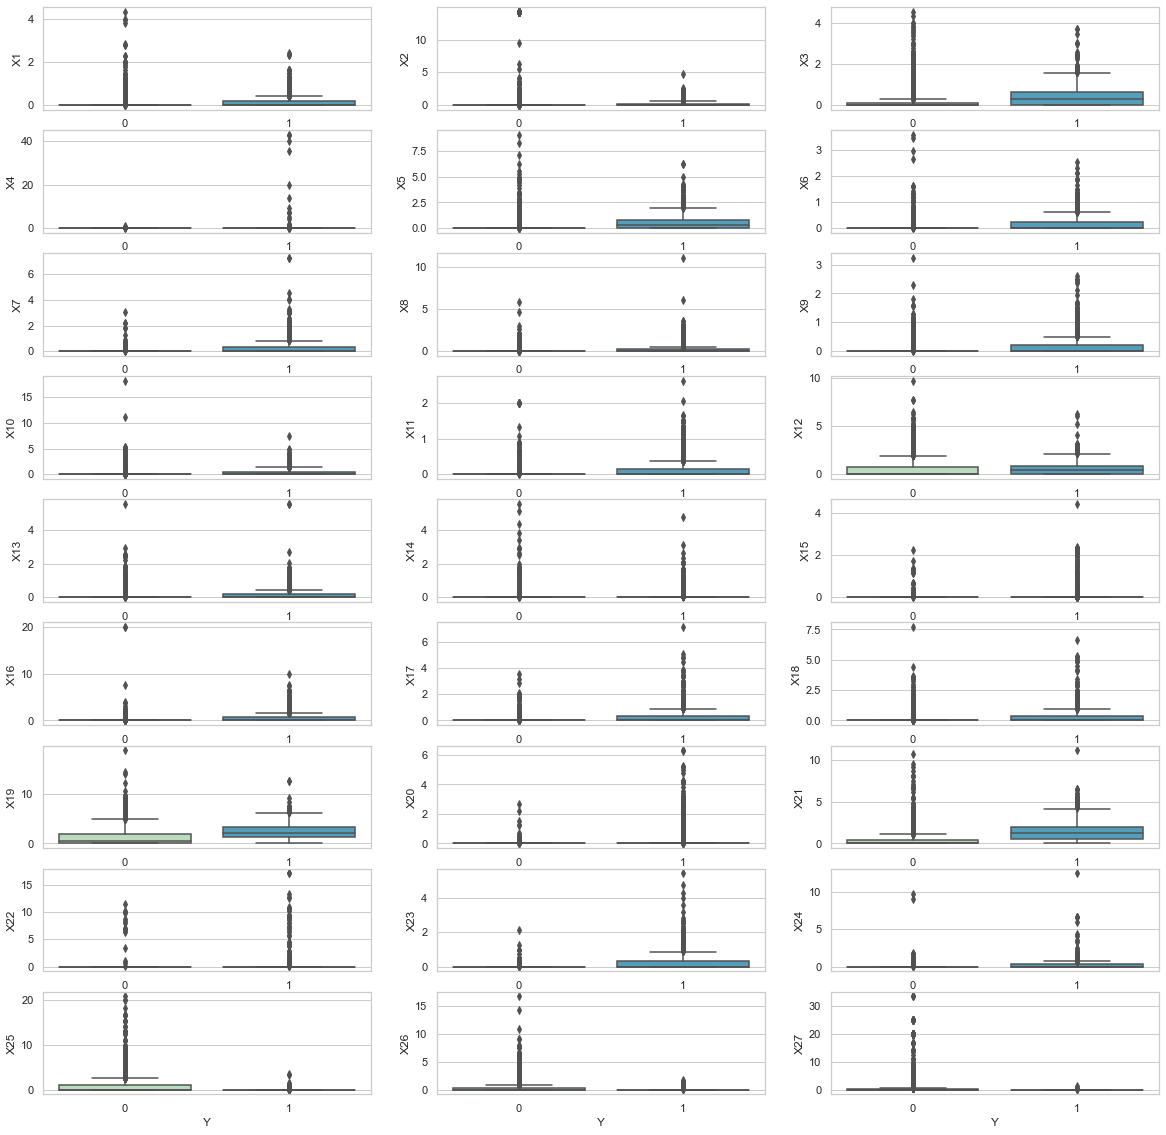

In [23]:
# box plot 
i = 1
plt.figure(figsize=(20,20))
for col in df.columns[:27]: 
    plt.subplot(9,3,i)
    sns.boxplot(x= "Y", y= col, data= df, palette = "GnBu")
    i+=1

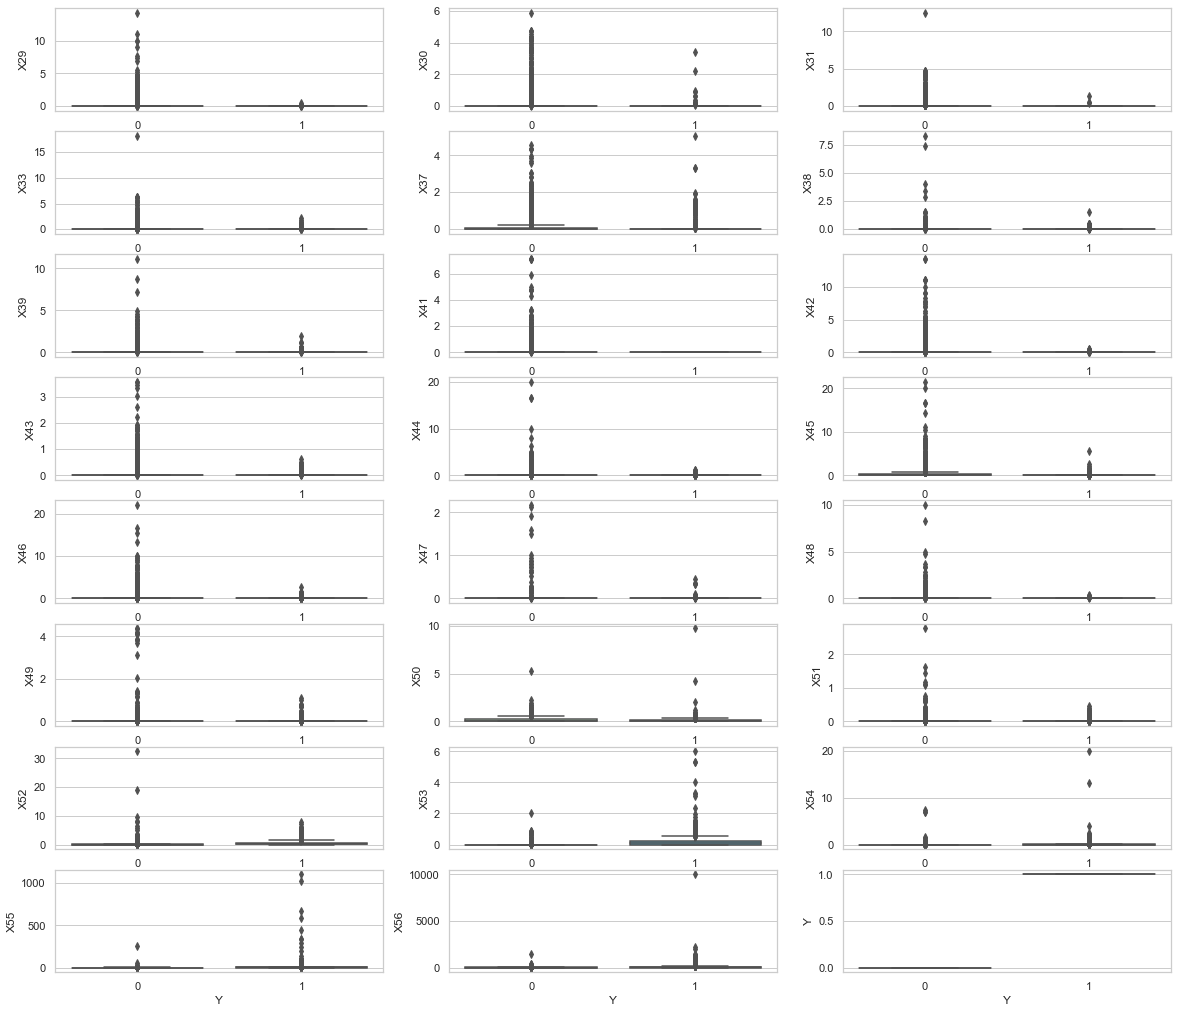

In [25]:
i = 1
plt.figure(figsize=(20,20))
for col in df.columns[28:]: 
    plt.subplot(9,3,i)
    sns.boxplot(x= "Y", y= col, data= df, palette = "GnBu")
    i+=1

In [26]:
df.shape

(3910, 52)

## Feature Selection

In [33]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import f_classif 
from sklearn.feature_selection import mutual_info_classif 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(['Y'],axis=1)
Y = df['Y']

print(X.shape)
print(Y.shape)

(3910, 51)
(3910,)


In [29]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
# define feature selection - filter methods function 
def feature_selection(variable_counts, score_function):
    selection_model = SelectKBest(score_func=score_function, k=variable_counts) # create a selection model based on the score function 
    selection = selection_model.fit(X_train, y_train) # fit the selection to the data
    features_selected = X_train.columns[selection.get_support()] # get the selected variables
    X_train_selected = selection_model.fit_transform(X_train, y_train) # transform the trainig data based on selected features
    
    # calculate the accuracy of prediction based on selected features
    reg = LogisticRegression()
    reg.fit(X_train_selected, y_train)
    y_pred = reg.predict(X_test[features_selected])
    return metrics.accuracy_score(y_test, y_pred), features_selected

<AxesSubplot:xlabel='features count', ylabel='accuracy'>

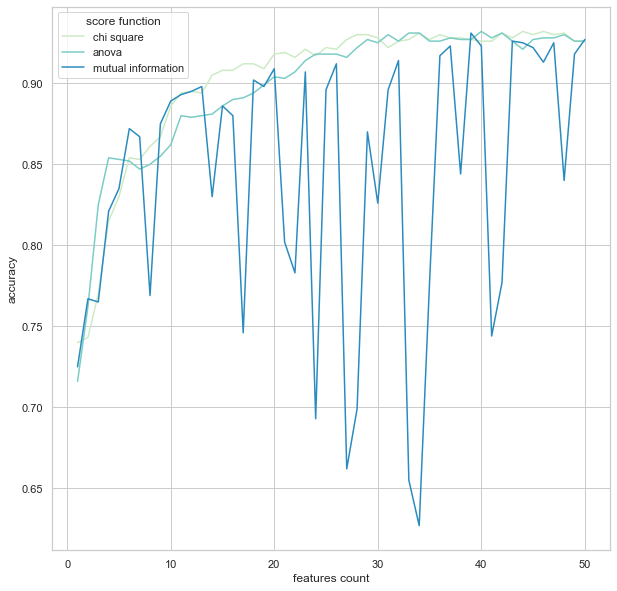

In [35]:
# create accuracy chart
accuracy_df = pd.DataFrame({"features count": [], "accuracy": [], "score function": [], "features selected": []})
function_list = [chi2, f_classif, mutual_info_classif]
function_name = ["chi square", "anova", "mutual information"]
for j in range(len(function_list)):
    func = function_list[j]
    func_name = function_name[j]
    for i in range(1, len(df.columns)-1):
        accuracy, features = feature_selection(i, func)
        new_record = {"features count": round(i), "accuracy": round(accuracy, 3), "score function": func_name, "features selected": features}
        accuracy_df = accuracy_df.append(new_record, ignore_index = True)
        
plt.figure(figsize = (10, 10))
sns.lineplot(data = accuracy_df, x = 'features count', y = 'accuracy', hue = 'score function', palette = "GnBu")

In [36]:
accuracy_df

,features count,accuracy,score function,features selected
0,1.0,0.740,chi square,"Index(['X56'], dtype='object')"
1,2.0,0.743,chi square,"Index(['X55', 'X56'], dtype='object')"
2,3.0,0.770,chi square,"Index(['X27', 'X55', 'X56'], dtype='object')"
3,4.0,0.815,chi square,"Index(['X25', 'X27', 'X55', 'X56'], dtype='obj..."
4,5.0,0.830,chi square,"Index(['X21', 'X25', 'X27', 'X55', 'X56'], dty..."
5,6.0,0.854,chi square,"Index(['X16', 'X21', 'X25', 'X27', 'X55', 'X56..."
6,7.0,0.853,chi square,"Index(['X16', 'X21', 'X25', 'X26', 'X27', 'X55..."
7,8.0,0.861,chi square,"Index(['X16', 'X19', 'X21', 'X25', 'X26', 'X27..."
8,9.0,0.867,chi square,"Index(['X7', 'X16', 'X19', 'X21', 'X25', 'X26'..."
9,10.0,0.886,chi square,"Index(['X7', 'X16', 'X19', 'X21', 'X23', 'X25'..."


We can see that taking 46 features gives the best accuracy considering the overall result from the chi_square, anova, and mutual information functions

In [43]:
accuracy_df[accuracy_df["features count"]==46]

,features count,accuracy,score function,features selected
45,46.0,0.932,chi square,"Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7..."
95,46.0,0.928,anova,"Index(['X1', 'X3', 'X5', 'X6', 'X7', 'X8', 'X9..."
145,46.0,0.913,mutual information,"Index(['X1', 'X2', 'X3', 'X5', 'X6', 'X7', 'X8..."


## Model Building

In [51]:
selected_features = list(accuracy_df[(accuracy_df["features count"]==46) & (accuracy_df["score function"]=="chi square")].iloc[0]['features selected'])
print(selected_features, len(selected_features), sep="\n")

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X33', 'X37', 'X39', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X48', 'X49', 'X52', 'X53', 'X54', 'X55', 'X56']
46


In [97]:
# selecting only specific columns for final model building and normalizing 
from sklearn.preprocessing import normalize

X = df[selected_features]
Y = df["Y"]

X_norm = normalize(X, norm='l2')

# split the dataset
X_train, X_val, y_train, y_val = train_test_split(X_norm, Y, test_size=0.2, random_state=42)

In [98]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(3128, 46) (3128,)
(782, 46) (782,)


In [99]:
# model training
model = LogisticRegression()
model.fit(X_train,y_train)

#prediction on validation set
y_pred = model.predict(X_val)
print("Model accuracy: {}".format(metrics.accuracy_score(y_val, y_pred)))

Model accuracy: 0.8375959079283888


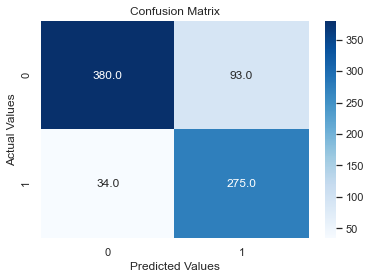

In [102]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, cmap = 'Blues', fmt=".1f")
plt.title("Confusion Matrix")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.savefig("Confusion matrix.png",format='png',dpi=1000, bbox_inches='tight')

In [103]:
print("**********  Classification Report  **********\n\n", classification_report(y_val,y_pred))

**********  Classification Report  **********

               precision    recall  f1-score   support

           0       0.92      0.80      0.86       473
           1       0.75      0.89      0.81       309

    accuracy                           0.84       782
   macro avg       0.83      0.85      0.83       782
weighted avg       0.85      0.84      0.84       782



## Prediction on test set

In [104]:
test = pd.read_csv("./Downloads/Arya_Assignment/test_set.csv").iloc[:, 1:]

# read first 5 rows
test.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [105]:
# extracting only selected columns and saving a copy

test_sf = test[selected_features]
test_sf.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X33,X37,X39,X41,X42,X43,X44,X45,X46,X48,X49,X52,X53,X54,X55,X56
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.105,0.000,0.000,2.342,47
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.776,0.129,0.000,10.375,168
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.325,0.756,0.153,5.891,193
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.490,0.158,0.015,8.550,669
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.729,0.121,0.000,7.781,32


In [107]:
# normalizing and finding prediction

X_test = normalize(test_sf, norm='l2')
preds = model.predict(X_test)

In [108]:
test['Y'] = preds
test.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89,1
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249,1
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040,1
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351,1
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249,0


In [109]:
# saving the dataframe to csv file
test.to_csv("result.csv", index=False)